In [83]:
import numpy as np
import matplotlib.pyplot as plt
import netCDF4
plt.rcParams.update({'font.size': 21})
plt.rcParams['lines.linewidth'] = 3

fp="data.nc"
nc = netCDF4.Dataset(fp)
RH=nc['RH'][:]
mom0=nc['moment0'][:]
mom3=nc['moment3'][:]
rw=np.sqrt(np.asarray(nc['wet_radius_squared'][:]))
vertical_velocity = getattr(nc, 'u_vertical')
dt = getattr(nc, 'dt')
rhod = getattr(nc, 'rhod')

n_tot= np.multiply(mom0,rhod)*1e-6 #1/cm-3 
rv3=np.divide(mom3,mom0) #m^3
rv=np.cbrt(rv3) #m
z=np.arange(len(RH))*vertical_velocity*dt

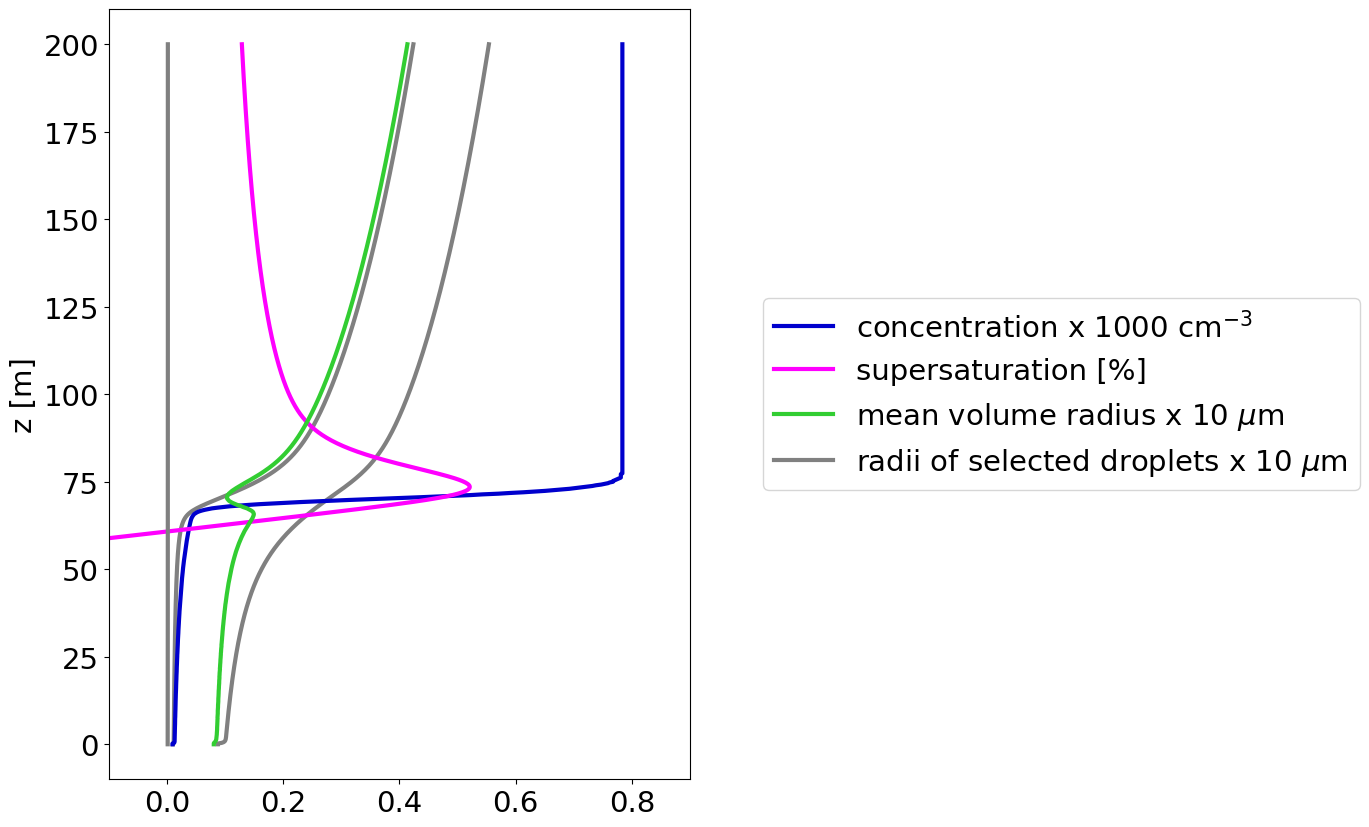

In [84]:
fig = plt.figure(1, figsize=(15,10))
ax = plt.subplot(111)
ax.set_ylabel('z [m]')    

for drop_id in [650,1400]:
    ax.plot(rw[:,drop_id]*1e6/10,z, c='grey')
ax.plot(n_tot/1000,z,label='concentration x 1000 cm$^{-3}$',c='mediumblue')
ax.plot((RH-1)*100,z,label='supersaturation [%]',c='magenta')
ax.plot(rv*1e6/10,z,label='mean volume radius x 10 $\mu$m',c='limegreen')
ax.plot(rw[:,0]*1e6/10,z, c='grey',label='radii of selected droplets x 10 $\mu$m') 
ax.set_xlim(-0.1,0.9)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.5, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1.1, 0.5))
plt.show()

In [85]:
for iz in range(0,1000,50):
    fig = plt.figure(1, figsize=(15,10))
    ax = plt.subplot(111)
    ax.set_ylabel('z [m]')  
    for drop_id in [650,1400]:
        ax.plot(rw[:iz,drop_id]*1e6/10,z[:iz], c='grey')
    ax.plot(n_tot[:iz]/1000,z[:iz],label='concentration x 1000 cm$^{-3}$',c='mediumblue')
    ax.plot((RH[:iz]-1)*100,z[:iz],label='supersaturation [%]',c='magenta')
    ax.plot(rv[:iz]*1e6/10,z[:iz],label='mean volume radius x 10 $\mu$m',c='limegreen')
    ax.plot(rw[:iz,0]*1e6/10,z[:iz], c='grey',label='radii of selected droplets x 10 $\mu$m') 
    ax.set_xlim(-0.1,0.9)
    ax.set_ylim(0,210)
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 0.55, box.height])
    ax.legend(loc='center left', bbox_to_anchor=(1.05, 0.5))
    plt.savefig('animation/'+str(int(iz*(vertical_velocity*dt)))+'.png')
    plt.close()